In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# Using haar cascades to detect facial features from an image

#An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it. We will use haar cascade from opencv for this. Source: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html?highlight=haar

In [3]:
#x,y and rgb values are represented by number 3
img = cv2.imread('./test_images/angelina4.jpg')
img.shape

(568, 474, 3)

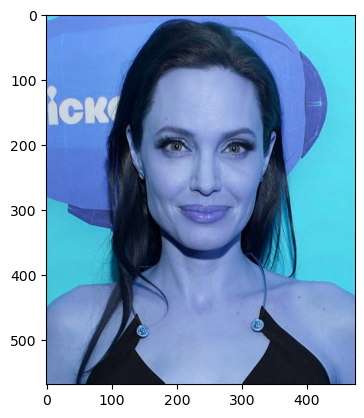

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(568, 474)

In [6]:
gray

array([[218, 217, 215, ..., 227, 230, 230],
       [215, 214, 212, ..., 224, 229, 229],
       [212, 211, 209, ..., 221, 227, 227],
       ...,
       [155, 154, 154, ..., 160, 163, 163],
       [156, 156, 155, ..., 162, 164, 164],
       [157, 157, 156, ..., 163, 164, 164]], dtype=uint8)

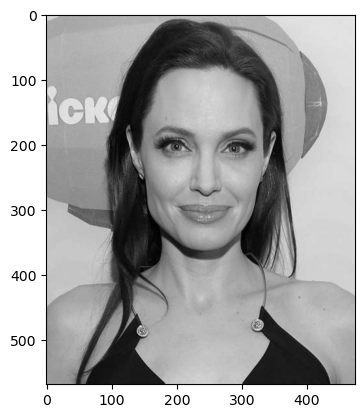

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[131, 116, 235, 235]], dtype=int32)

In [9]:
(x,y,w,h) = faces[0]
x,y,w,h

(131, 116, 235, 235)

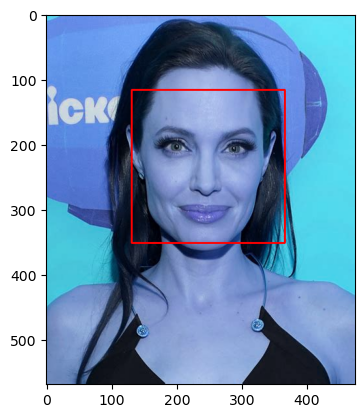

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

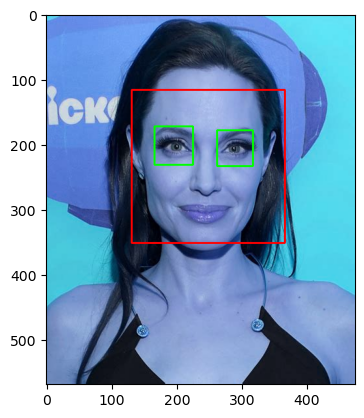

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

# Preprocessing: Crop the facial region of the image

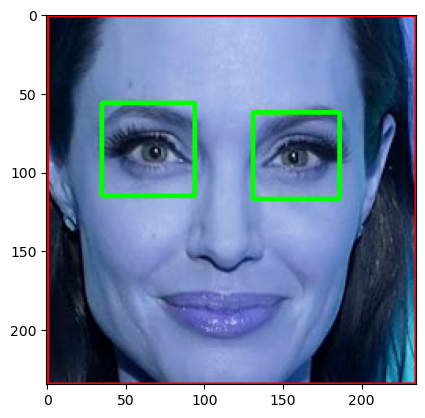

In [12]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [13]:
cropped_img = np.array(roi_color)
cropped_img.shape

(235, 235, 3)

# Wavelet transform for feature engineering

#In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

In [37]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    # 2 types: approximation and detail
    # approximation : 1 set
    # detail: n sets depending on level
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    
    #Process Coefficients
    coeffs_H=list(coeffs)  
    #print(coeffs_H)
    coeffs_H[0] *= 0;  
    #print(coeffs_H[0])
    
    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    #print(imArray_H)
    imArray_H *= 255;
    #used for arrays representing images
    imArray_H =  np.uint8(imArray_H)
    print(imArray_H)

    return imArray_H

[array([[ 3.8001223, 17.569605 , 20.627449 , 22.637009 , 21.648403 ,
        18.166786 ,  5.1337004, 11.830635 ],
       [ 7.0980387, 17.562744 , 20.121567 , 22.971931 , 22.155146 ,
        19.035046 ,  6.924019 ,  8.183578 ],
       [ 9.310537 , 11.063602 , 11.737498 , 19.071934 , 13.166787 ,
        11.03615  ,  9.509435 ,  6.675244 ],
       [12.828552 , 18.134312 , 19.874508 , 20.204533 , 18.96409  ,
        17.875854 , 11.150244 ,  4.6230383],
       [ 6.616911 , 17.940807 , 20.076223 , 18.273773 , 19.374018 ,
        19.246199 ,  7.4069843,  7.9936266],
       [ 4.5585775, 15.047056 , 16.031982 , 16.017277 , 16.534433 ,
        15.010782 ,  5.167156 ,  9.372548 ],
       [ 2.3662987,  8.674141 , 16.228184 , 17.143503 , 17.123652 ,
         7.9470572,  4.055146 , 12.965929 ],
       [ 5.03897  ,  5.2801466, 12.196812 , 16.786762 , 13.631126 ,
         4.6874995,  6.2274504, 12.848037 ]], dtype=float32), (array([[-0.11776951, -0.9857837 , -0.67794085, -0.78627473, -0.7888477 ,
    

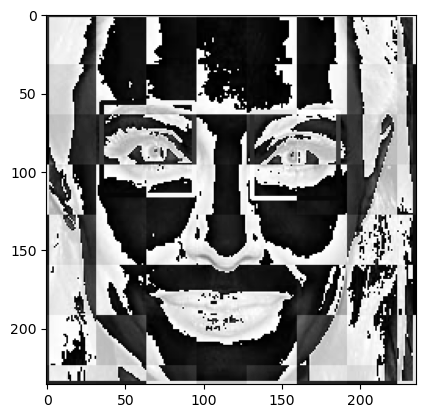

In [23]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


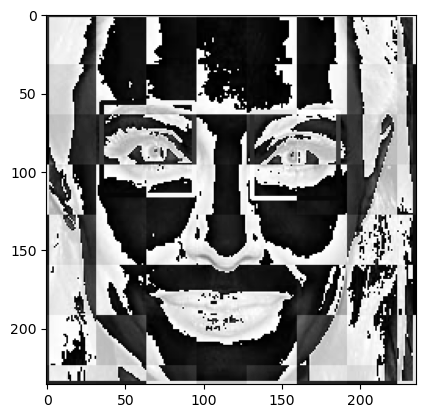

In [30]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

[[ 45  45  45 ... 238 238 238]
 [ 45  45  45 ... 238 238 238]
 [ 45  45 237 ...  45 238 238]
 ...
 [ 35  35 239 ...  57 230 230]
 [ 35  35  35 ... 230 230 230]
 [ 35  35  35 ... 230 230 230]]


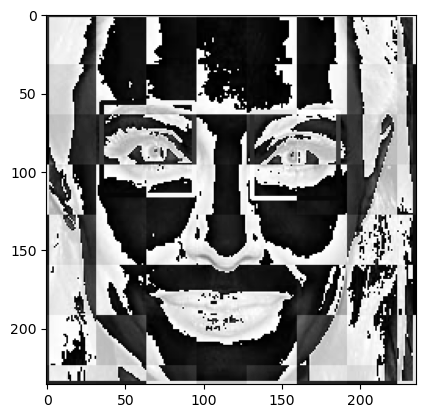

In [38]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [15]:
# To retrieve only faces which have 2 visible eyes, discard others

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

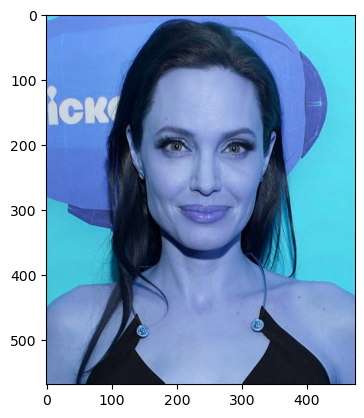

In [16]:
original_image = cv2.imread('./test_images/angelina4.jpg')
plt.imshow(original_image)

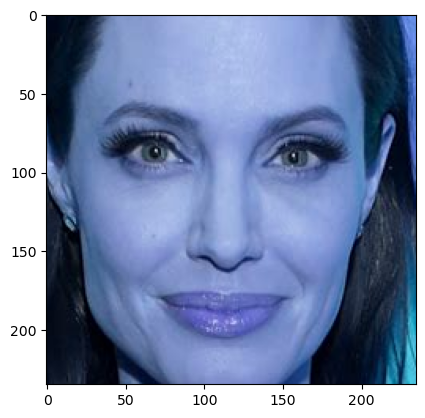

In [17]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/angelina4.jpg')
plt.imshow(cropped_image)

**In below image face is not very clear and it doesn't have two eyes clearly visible**

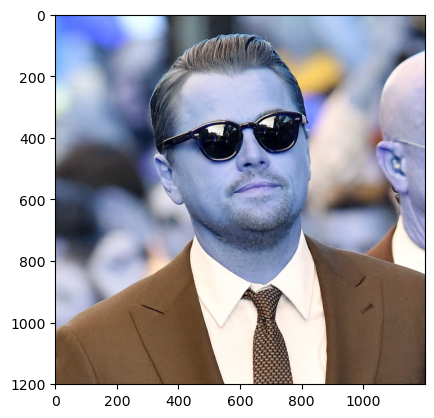

In [18]:
org_image_obstructed = cv2.imread('./test_images/leo_sunglasses1.jpg')
plt.imshow(org_image_obstructed)

In [20]:
cropped_image_org_image_obstructed = get_cropped_image_if_2_eyes('./test_images/leo_sunglasses1.jpg')
print(cropped_image_org_image_obstructed)

None


In [43]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/angelina4.jpg')
cropped_image_no_2_eyes

array([[[  1,  14,  36],
        [  5,  14,  34],
        [  5,  14,  34],
        ...,
        [ 98, 140, 229],
        [104, 144, 232],
        [109, 149, 237]],

       [[  2,  13,  35],
        [  4,  13,  33],
        [  6,  13,  33],
        ...,
        [100, 142, 231],
        [104, 144, 232],
        [109, 149, 237]],

       [[  0,  11,  31],
        [  2,  11,  31],
        [  4,  11,  31],
        ...,
        [102, 145, 232],
        [102, 142, 230],
        [106, 146, 234]],

       ...,

       [[  5,  13,  30],
        [  5,  13,  30],
        [ 14,  22,  39],
        ...,
        [ 73, 199, 227],
        [ 75, 195, 224],
        [ 74, 192, 221]],

       [[  5,  13,  30],
        [  4,  12,  29],
        [ 15,  23,  40],
        ...,
        [ 73, 199, 227],
        [ 73, 193, 222],
        [ 77, 195, 224]],

       [[  6,  14,  31],
        [  3,  11,  28],
        [ 16,  24,  41],
        ...,
        [ 75, 201, 229],
        [ 71, 191, 220],
        [ 82, 200, 229]]

# Creating a cropped folder containing images of face

In [44]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [45]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [46]:
img_dirs

['./dataset/angelina_jolie',
 './dataset/denzel_washington',
 './dataset/leonardo_di_caprio',
 './dataset/megan_fox',
 './dataset/natalie_portman']

In [47]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [48]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    l = ['./dataset/cropped\Angelina Jolie']
    
    for entry in os.scandir(img_dir):
        if entry.path not in l:
            roi_color = get_cropped_image_if_2_eyes(entry.path)

            if roi_color is not None:
                cropped_folder = path_to_cr_data + celebrity_name

                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ",cropped_folder)

                cropped_file_name = celebrity_name + str(count) + ".png"
                cropped_file_path = cropped_folder + "/" + cropped_file_name

                cv2.imwrite(cropped_file_path, roi_color)

                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1

Generating cropped images in folder:  ./dataset/cropped/angelina_jolie
Generating cropped images in folder:  ./dataset/cropped/denzel_washington
Generating cropped images in folder:  ./dataset/cropped/leonardo_di_caprio
Generating cropped images in folder:  ./dataset/cropped/megan_fox
Generating cropped images in folder:  ./dataset/cropped/natalie_portman


In [49]:
# Manually examine cropped folder and delete any unwanted images

In [50]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'angelina_jolie': ['./dataset/cropped/angelina_jolie\\angelina_jolie1.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie10.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie11.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie12.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie13.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie14.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie15.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie16.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie17.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie18.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie19.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie2.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie20.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie21.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie22.png',
  './dataset/cropped/angelina_jolie\\angelina_jolie23.png',
  './dataset/cropped/ang

In [51]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'angelina_jolie': 0,
 'denzel_washington': 1,
 'leonardo_di_caprio': 2,
 'megan_fox': 3,
 'natalie_portman': 4}

# Stacking vertically raw images with wavelet transformed images

In [52]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [53]:
len(X)

413

In [54]:
len(X[0])

4096

In [55]:
32*32*3 + 32*32

4096

In [56]:
X[0]

array([[249],
       [228],
       [226],
       ...,
       [  3],
       [243],
       [227]], dtype=uint8)

In [57]:
y[0]

0

In [58]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(413, 4096)

# Model Training

We will use SVM with rbf kernel tuned  with heuristic finetuning

In [59]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7403846153846154

In [61]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.62      0.57      0.59        28
           1       0.93      0.81      0.87        16
           2       0.85      0.94      0.89        18
           3       0.71      0.81      0.76        21
           4       0.70      0.67      0.68        21

    accuracy                           0.74       104
   macro avg       0.76      0.76      0.76       104
weighted avg       0.74      0.74      0.74       104



# GridSearchCV to find the best model

In [62]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [63]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [64]:
# Models are tested on validation set

scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.747541,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.559968,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.783289,{'logisticregression__C': 1}


In [65]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [66]:
# Models are tested on test set

In [67]:
best_estimators['svm'].score(X_test,y_test)

0.7980769230769231

In [68]:
best_estimators['random_forest'].score(X_test,y_test)

0.5769230769230769

In [69]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8173076923076923

In [70]:
best_clf = best_estimators['svm']

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[21,  0,  0,  2,  5],
       [ 3, 12,  1,  0,  0],
       [ 1,  0, 17,  0,  0],
       [ 2,  1,  0, 18,  0],
       [ 3,  0,  1,  2, 15]], dtype=int64)

In [72]:
#The graph represents for how many instances the model predicted right

Text(95.72222222222221, 0.5, 'Truth')

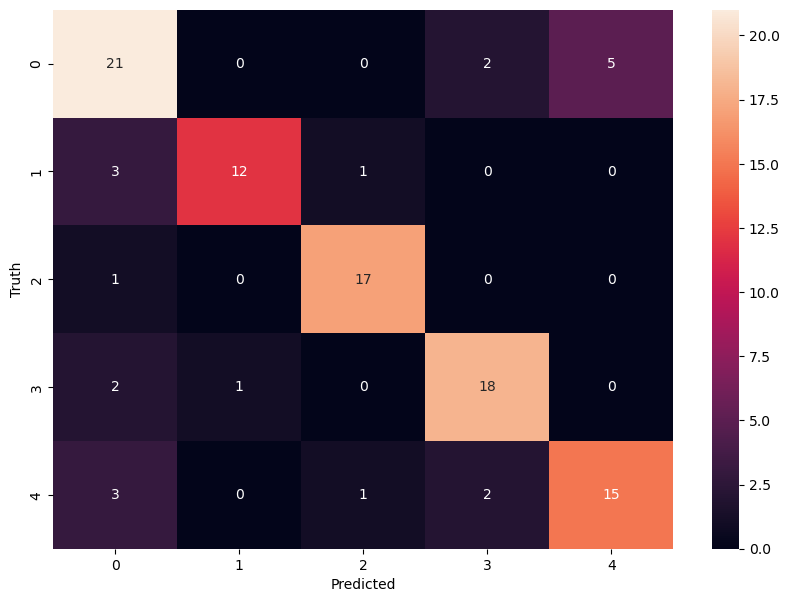

In [73]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [74]:
class_dict

{'angelina_jolie': 0,
 'denzel_washington': 1,
 'leonardo_di_caprio': 2,
 'megan_fox': 3,
 'natalie_portman': 4}

### Save the trained model

In [ ]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

### Save class dictionary

In [76]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))